In [84]:
import math
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
'''정규분포 cdf의 역함수'''
def inv_normal_df(u):
    return stats.norm.ppf(u)

In [13]:
'''Uniform 분포 값 발생'''
random_num = [random.random() for x in range (10000)]

inv_normal_df_list = [inv_normal_df(u) for u in random_num]

inv_normal_df_list[0:4]

[-0.4658967109812093,
 -1.5692786145556141,
 0.3119315534638246,
 -0.17311538293948564]

In [16]:
min(inv_normal_df_list)

-4.249162235229884

In [17]:
max(inv_normal_df_list)

4.178073698944509

In [21]:
histogram = np.histogram(inv_normal_df_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(-5, 5)
y = stats.norm.pdf(x)

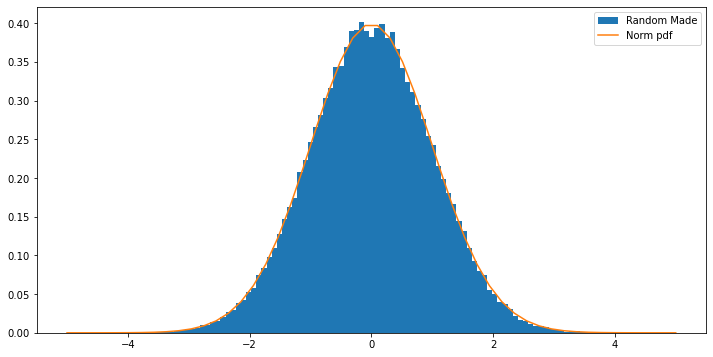

In [29]:
plt.figure(figsize=(12,6))
plt.hist(inv_normal_df_list, density=True, bins=100, label='Random Made')
plt.plot(x, y, label='Norm pdf')
plt.legend()
plt.show()

## Exponential Random Variable

In [70]:
def inv_exponential_df(u, theta):
    return -np.log(1-u)/theta

def expon_pdf(u, theta):
    return theta * np.exp(-theta*u)

def expon_cdf(u, theta):
    return 1 - np.exp(-theta*u)

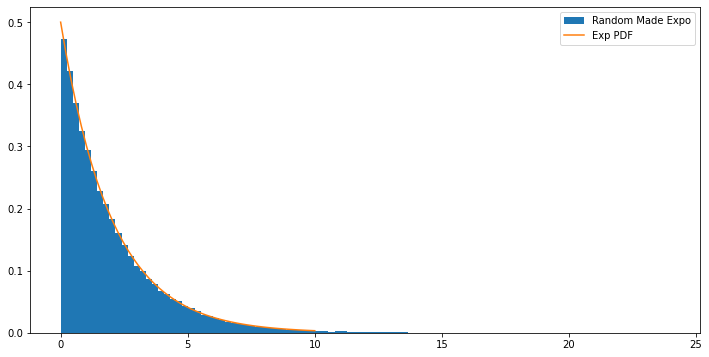

In [73]:
theta = 0.5

random_num = [random.random() for x in range (100000)]
inv_exp_list = [inv_exponential_df(x, theta) for x in random_num]

histogram = np.histogram(inv_exp_list)
histogram_distribution = stats.rv_histogram(histogram)

x = np.linspace(0, 10)
y = expon_pdf(x, theta)

plt.figure(figsize=(12,6))
plt.hist(inv_exp_list, bins=100, density=True, label='Random Made Expo')
plt.plot(x, y, label='Exp PDF')
plt.legend()
plt.show()

## Acceptance-Rejection Method

$$ f(x) \leq cg(x) $$

1. Generate $X$ from $g$
2. Generate $U$
3. Accept $X$ if $U \leq f(X)/cg(X)$

$$P(Y \in A) = \int_{A}^{} f(x)\, dx$$

In [114]:
def ar_func (u, a1, a2):

    def eq (u, a1, a2):
        return u**(a1-1)*(1-u)**(a2-1)
        
    beta = scipy.integrate.quad(lambda u: eq(u, a1, a2), 0, 1)[0]
    a = eq(u, a1, a2)

    return 1/beta * a

In [121]:
type(u2) == list

True

In [129]:
def ar_func (u):
    if type(u) == list:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)

        value_list = []
        for i in u:
            beta = scipy.integrate.quad(lambda i: eq(i), 0, 1)[0]
            a = eq(i)
            value = 1/beta * a
            value_list.append(value)
        return value_list

    else:

        def eq (u):
            return u**(3-1)*(1-u)**(2-1)
            
        beta = scipy.integrate.quad(lambda u: eq(u), 0, 1)[0]
        a = eq(u)

        return 1/beta * a



In [100]:
ar_func(2/3, 3, 2)

1.7777777777777781

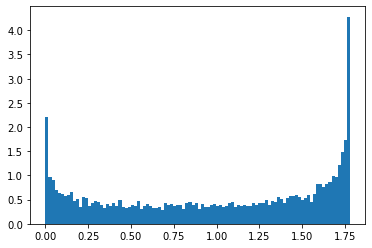

In [111]:
random_num = [random.random() for x in range (10000)]
ar_list = [ar_func(u, 3, 2) for u in random_num]

plt.hist(ar_list, density=True, bins=100, label='Random Made')
plt.show()

In [148]:
u1 = [random.random() for x in range(10000)]
u2 = [random.random() for x in range(10000)]

u1[u2<=ar_func(u1)]

0.2505954516602923